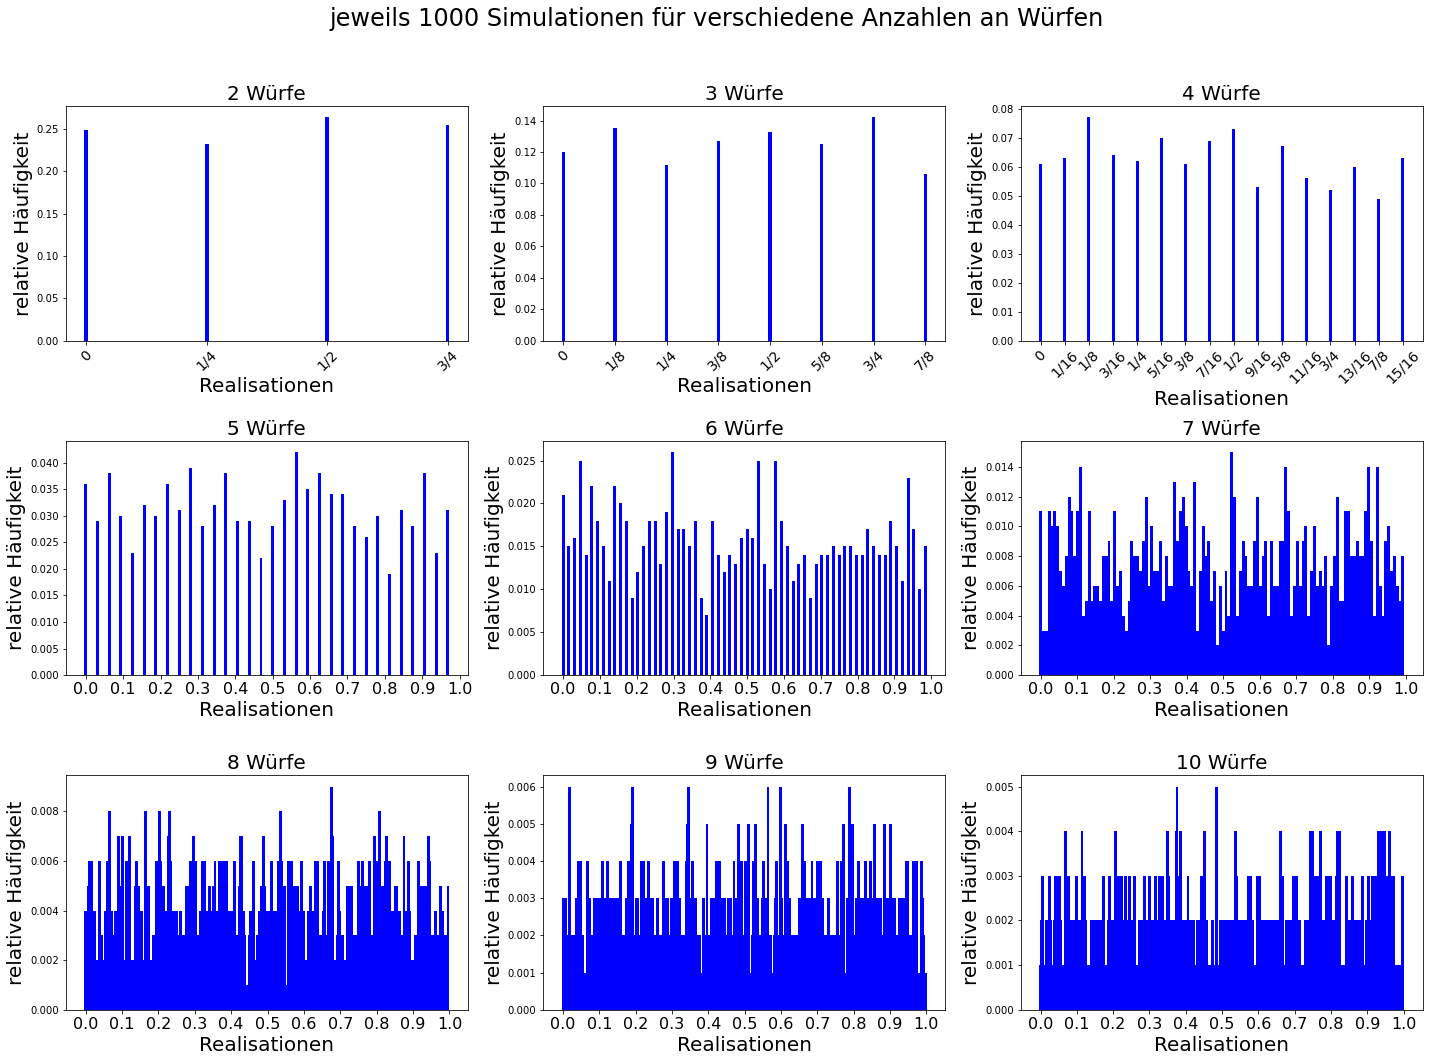

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from fractions import Fraction

def simulate_sequence_values(num_flips, probability, num_trials):
    flips = np.random.binomial(1, probability, (num_trials, num_flips))
    values = np.sum(flips * (1 / 2) ** np.arange(1, num_flips + 1), axis=1)
    return values

def plot_3x3_simulations(probability, num_trials, save_as_png=False, figsize=(15, 12)):
    fig, axes = plt.subplots(3, 3, figsize=figsize)
    fig.suptitle(f"jeweils {num_trials} Simulationen für verschiedene Anzahlen an Würfen", fontsize=24)
    
    # Iteriere über ein 3x3-Raster und stelle jeweils num_flips von 2 bis 10 dar
    for i, num_flips in enumerate(range(2, 11)):
        row, col = divmod(i, 3)  # Bestimme die Zeilen- und Spaltenposition im Raster
        ax = axes[row, col]  # Hole die aktuelle Achse
        
        # Simuliere die Werte der Sequenzen für das aktuelle num_flips
        sequence_values = simulate_sequence_values(num_flips, probability, num_trials)
        
        # Berechne die einzigartigen Werte und ihre Häufigkeiten
        unique_values, counts = np.unique(sequence_values, return_counts=True)
        relative_frequencies = counts / num_trials
        
        # Zeichne das Histogramm für die Häufigkeitsverteilung
        ax.bar(unique_values, relative_frequencies, width=0.008, color='blue')
        
        # Bruchdarstellung auf der x-Achse für n < 5, Dezimalwerte für n >= 5
        if num_flips < 5:
            x_labels = [Fraction(value).limit_denominator() for value in unique_values]
            ax.set_xticks(unique_values)
            ax.set_xticklabels([str(f) for f in x_labels], rotation=45, fontsize=14)
        else:
            ax.set_xticks(np.linspace(0, 1, 11))
            ax.set_xticklabels([f"{x:.1f}" for x in np.linspace(0, 1, 11)], fontsize=16)
        
        # Achsen beschriften und Titel hinzufügen
        ax.set_title(f"{num_flips} Würfe", fontsize=20)
        ax.set_xlabel("Realisationen", fontsize=20)
        ax.set_ylabel("relative Häufigkeit", fontsize=20)
    
    # Layout-Anpassung für bessere Darstellung
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    
    # Bild speichern, falls gewünscht
    if save_as_png:
        plt.savefig("3x3_Simulationen.png", format="png", dpi=300)
    
    plt.show()

# Parameter für die Simulationen
probability = 0.5      # Wahrscheinlichkeit für einen Treffer (z.B. faire Münze)
num_trials = 1000     # Anzahl der Simulationen pro Plot

# Simulationen ausführen und 3x3-Raster erstellen
plot_3x3_simulations(probability, num_trials, save_as_png=True, figsize=(20, 15))